<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Artist
</font>
</h1>
<br>


In [ ]:
# uncomment the following line if you are running this notebook on Google Colab
# this will install the most recent version of TensorFlow and Keras 3

!pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 30.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [ ]:
import keras
print(keras.__version__)

3.1.1


In [ ]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score

<br>
<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Dataset
</font>
</h2>

`!gdown 1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD`

In [ ]:
# use the following line to prevent some possible errors

!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
# use the following line to download the dataset if you haven't already

!gdown 1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD

Downloading...
From (original): https://drive.google.com/uc?id=1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD
From (redirected): https://drive.google.com/uc?id=1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD&confirm=t&uuid=db463d6f-673d-4dc6-8000-4cb46d748dca
To: /content/famous_paintings.zip
100% 611M/611M [00:05<00:00, 108MB/s]


In [ ]:
# use the following line to unzip the dataset if you didn't do it before

!unzip famous_paintings.zip > /dev/null 2>&1

<br>
<h3 align=left style="line-height:200%;font-family:vazir;color:#0099cc;">
<font face="vazir" color="#0099cc">
Data Processing...
</font>
</h3>

<p  style=" text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3 color='gray'>
Creating a dataframe based on the file location and the painters' names. We will add the 'painter' column which will be help to extract labels. 
</font>
</p>

In [ ]:
dir_name = 'data/*'
files = glob.glob(dir_name)
df_train = pd.DataFrame({'full_path': files})
file_name = df_train['full_path'].str.split('data/').str[1]
painters = file_name.str.rsplit('_',1).str[0]
df_train['painter'] = painters
df_train.head()

<ipython-input-8-a23dc80b4689>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  painters = file_name.str.rsplit('_',1).str[0]


full_path            painter
0      data/Paul_Gauguin_125.jpg       Paul_Gauguin
1  data/Vincent_van_Gogh_792.jpg   Vincent_van_Gogh
2       data/Pablo_Picasso_9.jpg      Pablo_Picasso
3  data/Peter_Paul_Rubens_36.jpg  Peter_Paul_Rubens
4  data/Vincent_van_Gogh_354.jpg   Vincent_van_Gogh

In [ ]:
# get the list of unique painters in the dataset
class_names = df_train.painter.unique()
print(class_names)

['Paul_Gauguin' 'Vincent_van_Gogh' 'Pablo_Picasso' 'Peter_Paul_Rubens'
 'Rene_Magritte' 'Edgar_Degas' 'Amedeo_Modigliani' 'Rembrandt'
 'Albrecht_Durer' 'Frida_Kahlo' 'Henri_Matisse' 'Pierre-Auguste_Renoir'
 'Pieter_Bruegel' 'Titian' 'Alfred_Sisley' 'Marc_Chagall' 'Francisco_Goya'
 'Mikhail_Vrubel' 'Sandro_Botticelli' 'Andy_Warhol' 'Salvador_Dali'
 'Paul_Klee' 'Leonardo_da_Vinci' 'Kazimir_Malevich' 'Hieronymus_Bosch']


<br>
<p style="text-align: justify; line-height:200%; font-family:vazir;">
<font face="vazir" size=3 color="gray">
Represnting some of the paintings..
</font>
</p>

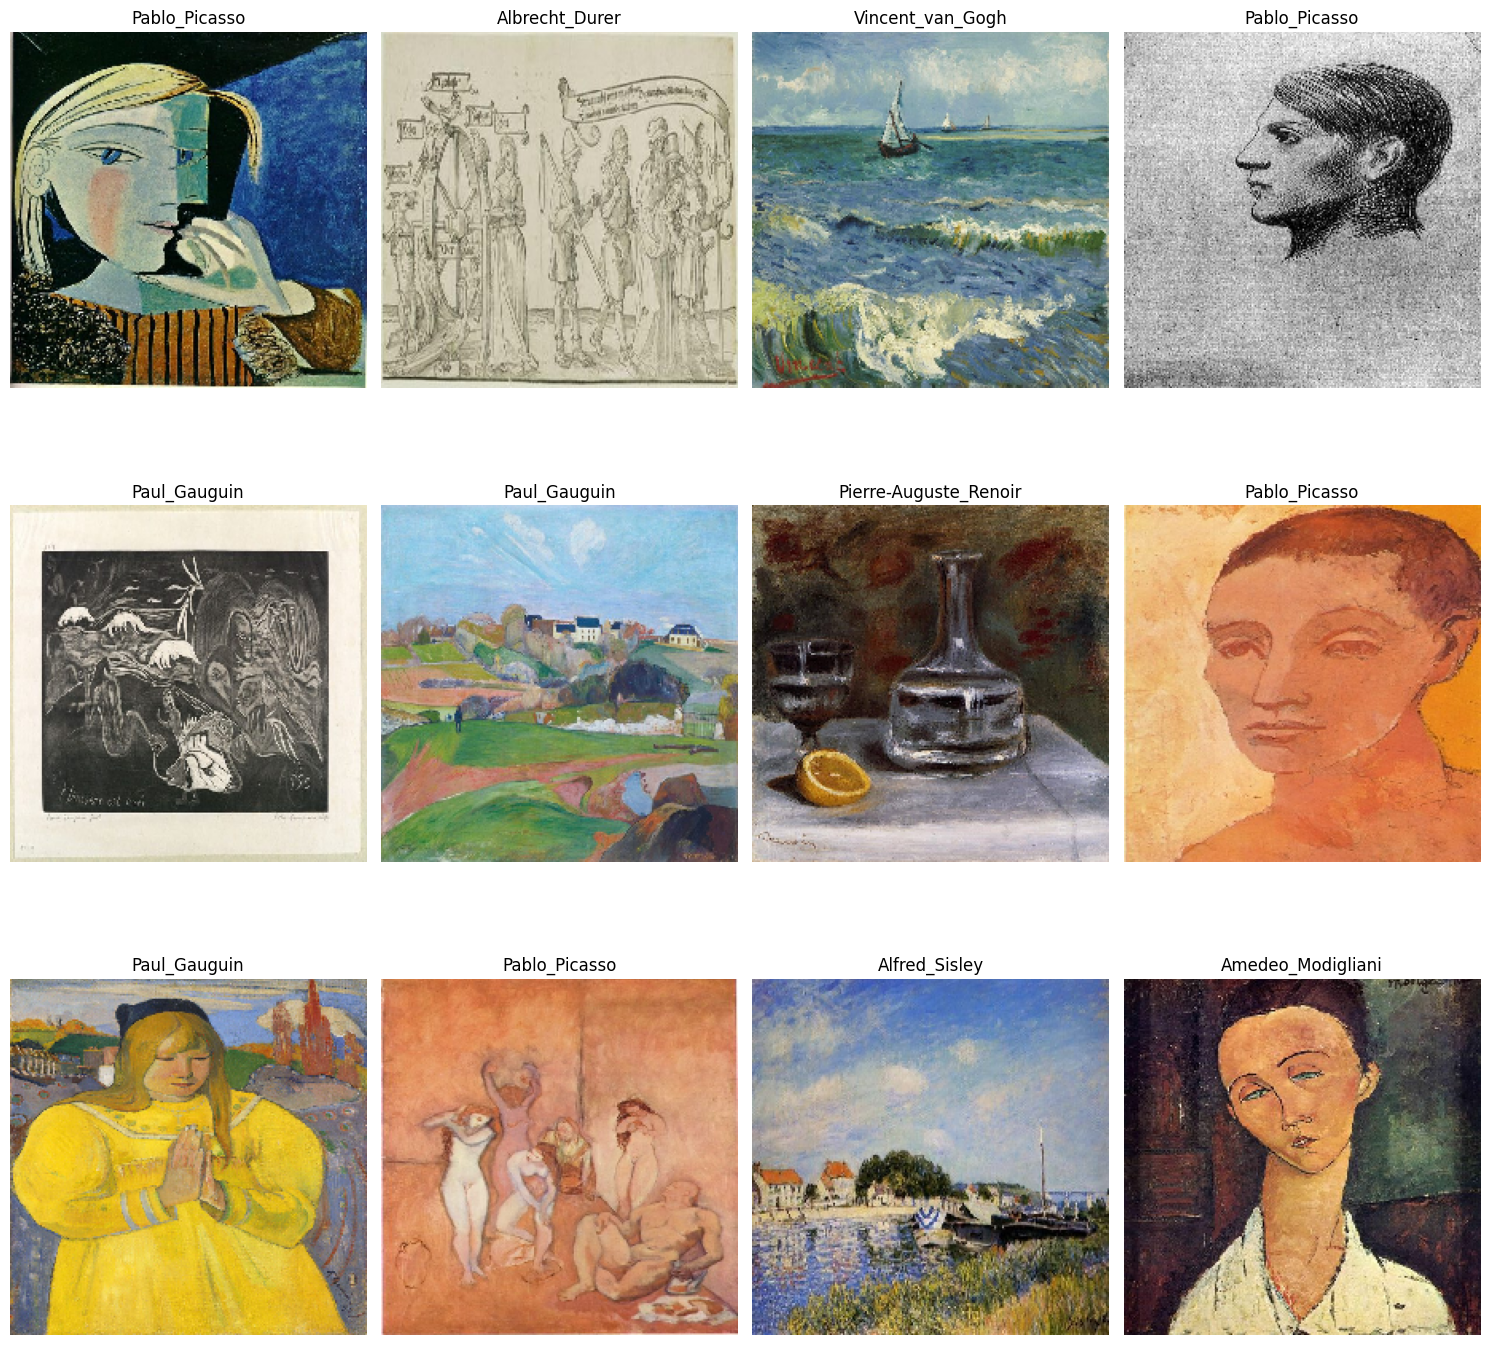

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
random_indices = np.random.choice(df_train.index, size=12, replace=False)
for i, ax in zip(random_indices, axes.flatten()):
    img = keras.preprocessing.image.load_img(df_train.full_path[i], target_size=(224, 224))
    ax.imshow(img)
    ax.set_title(df_train.painter[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train.painter)
df_train.head()

full_path            painter  label
0      data/Paul_Gauguin_125.jpg       Paul_Gauguin     14
1  data/Vincent_van_Gogh_792.jpg   Vincent_van_Gogh     24
2       data/Pablo_Picasso_9.jpg      Pablo_Picasso     13
3  data/Peter_Paul_Rubens_36.jpg  Peter_Paul_Rubens     16
4  data/Vincent_van_Gogh_354.jpg   Vincent_van_Gogh     24

In [ ]:
print(df_train['label'].unique().min())
print(df_train['label'].unique().max())

0
24


<br>
<p  style="text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3 color="gray">
Creating subfolders based on each label(painter) for keras' image_dataset_from_directory
</font>
</p>

In [ ]:
import shutil

# create a folder for each label
for label in df_train.label.unique():
    os.makedirs(f'data/{label}', exist_ok=True)

# move each image to its corresponding label folder
for i, row in df_train.iterrows():
    shutil.move(row.full_path, f'data/{row.label}')

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64
NUM_CLASSES = len(class_names)

In [ ]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory='./data/',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

# find the class names so in prediction time we can map the predictions to the painters properly
class_names = train_dataset.class_names
print('Class names:', class_names)

val_dataset = image_dataset_from_directory(
    directory='./data/',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 6516 files belonging to 25 classes.
Using 5213 files for training.
Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9']
Found 6516 files belonging to 25 classes.
Using 1303 files for validation.


<br>
<h3 dir=ltr align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Preprocessing...
</font>
</h3>


In [ ]:
from keras.applications.resnet50 import preprocess_input

# Preprocess the data
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

<br>
<h3 dir=ltr align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model
</font>
</h3>


In [ ]:
import plotly.express as px

# metric: 'accuracy' or 'loss'
def display_curves(history, metric):
  df = pd.DataFrame(history.history[metric], columns=[metric])
  df['val_'+metric] = history.history['val_'+metric]
  fig = px.line(df, x= df.index+1, y= [metric, 'val_'+metric])
  fig.update_layout(xaxis_title='Epochs', yaxis_title=metric)
  fig.show()

<p style="text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<span style="color:green"><b>First Model:</b></span>
using ResNet structure and training all weights.
</font>
</p

In [ ]:
model1 = keras.applications.ResNet50(input_shape= IMAGE_SIZE + (3,),
                                     classes= NUM_CLASSES,
                                     weights= None)

In [ ]:
model1.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,638,937 (90.18 MB)

 Trainable params: 23,585,817 (89.97 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model1.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model.keras", save_best_only=True, monitor="val_loss")
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

EPOCHS = 15
history1 = model1.fit(train_dataset,
                     validation_data = val_dataset,
                     epochs = EPOCHS,
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 128s 952ms/step - accuracy: 0.1982 - loss: 3.6665 - val_accuracy: 0.0023 - val_loss: 2492.7419
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 61s 726ms/step - accuracy: 0.3027 - loss: 2.4663 - val_accuracy: 0.2464 - val_loss: 3.1065
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 77s 663ms/step - accuracy: 0.3646 - loss: 2.1223 - val_accuracy: 0.1120 - val_loss: 3.0310
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 59s 699ms/step - accuracy: 0.3889 - loss: 1.9901 - val_accuracy: 0.3231 - val_loss: 2.5167
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 84s 728ms/step - accuracy: 0.4124 - loss: 1.9661 - val_accuracy: 0.2824 - val_loss: 2.4878
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 80s 710ms/step - accuracy: 0.4483 - loss: 1.8653 - val_accuracy: 0.3569 - val_loss: 2.3415
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 57s 682ms/step - accuracy: 0.4625 - loss: 1.7793 - val_accuracy: 0.3223 - val_loss: 5.3338
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 89s 767ms/step - accuracy: 0.4852 - loss: 1.7426 - val_

In [ ]:
display_curves(history1, 'loss')

In [ ]:
display_curves(history1, 'accuracy')

<p style="text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<span style="color:green"><b>Second Model:</b></span>
using ResNet with frozen early layers and only training the final layers. 
</font>
</p

In [ ]:
model2 = keras.applications.ResNet50(input_shape= IMAGE_SIZE + (3,),
                                     weights= 'imagenet',
                                     include_top= False,
                                     pooling= 'avg')
model2.trainable = False
x = keras.layers.Flatten()(model2.output)
x = keras.layers.Dense(512,activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
model2 = keras.models.Model(model2.input, x)

In [ ]:
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,649,625 (94.03 MB)

 Trainable params: 1,061,913 (4.05 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model2.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model2.keras", save_best_only=True, monitor="val_loss")
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

EPOCHS = 15
history2 = model2.fit(train_dataset,
                     validation_data = val_dataset,
                     epochs = EPOCHS,
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 530ms/step - accuracy: 0.3922 - loss: 2.3005 - val_accuracy: 0.7843 - val_loss: 0.7689
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 432ms/step - accuracy: 0.7513 - loss: 0.8540 - val_accuracy: 0.8312 - val_loss: 0.6175
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 428ms/step - accuracy: 0.8375 - loss: 0.5446 - val_accuracy: 0.8642 - val_loss: 0.4536
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 400ms/step - accuracy: 0.8704 - loss: 0.4055 - val_accuracy: 0.9271 - val_loss: 0.2729
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 32s 378ms/step - accuracy: 0.9005 - loss: 0.3110 - val_accuracy: 0.8964 - val_loss: 0.3612
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 395ms/step - accuracy: 0.9279 - loss: 0.2223 - val_accuracy: 0.9309 - val_loss: 0.2718
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 45s 446ms/step - accuracy: 0.9342 - loss: 0.1980 - val_accuracy: 0.9363 - val_loss: 0.2256
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 426ms/step - accuracy: 0.9663 - loss: 0.1276 - val_accu

In [ ]:
display_curves(history2, 'loss')

In [ ]:
display_curves(history2, 'accuracy')

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Prediction and Evaluation..
</font>
</h2>



In [ ]:
best_model = keras.models.load_model("model2.keras")
best_model.evaluate(val_dataset)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:396: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 434 variables whereas the saved optimizer has 10 variables. 



21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 290ms/step - accuracy: 0.9551 - loss: 0.1527


[0.16438263654708862, 0.953952431678772]

In [ ]:
test_dataset = image_dataset_from_directory(
    directory='./test_data/',
    label_mode=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False
)
image_names = [img.split('/')[-1].split('.jpg')[0] for img in test_dataset.file_paths]
test_dataset = test_dataset.map(lambda x: preprocess_input(x))

Found 300 files.


In [ ]:
predictions = best_model.predict(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step


In [ ]:
predictions = np.argmax(predictions, axis=1)
predictions = [int(class_names[pred]) for pred in predictions]

In [ ]:
predictions = le.inverse_transform(predictions)

In [ ]:
submission = pd.DataFrame(columns=['file', 'artist'])
submission['file'] = image_names
submission['artist'] = predictions
submission

file                 artist
0      test_0      Leonardo_da_Vinci
1      test_1            Andy_Warhol
2     test_10         Albrecht_Durer
3    test_100          Pablo_Picasso
4    test_101         Francisco_Goya
..        ...                    ...
295   test_95  Pierre-Auguste_Renoir
296   test_96         Francisco_Goya
297   test_97          Rene_Magritte
298   test_98          Rene_Magritte
299   test_99              Paul_Klee

[300 rows x 2 columns]

<h2 align=Left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>Zip</b>
</font>
</h2>


In [ ]:
import zipfile
import joblib

if not os.path.exists(os.path.join(os.getcwd(), 'artist.ipynb')):
    %notebook -e artist.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['submission.csv', 'artist.ipynb']
compress(file_names)

File Paths:
['submission.csv', 'artist.ipynb']
